In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('supermarket_data.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [6]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [7]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df.City.replace({ 'Yangon':'Ekiti','Mandalay':'Taraba','Naypyitaw':'Kogi'}, inplace=True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Ekiti,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Kogi,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Ekiti,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Ekiti,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Ekiti,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [10]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [11]:
df.Branch.unique()

array(['A', 'C', 'B'], dtype=object)

In [12]:
df.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [13]:
df.City.unique()

array(['Ekiti', 'Kogi', 'Taraba'], dtype=object)

In [14]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [15]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [16]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [17]:
df.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [18]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [19]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [20]:
#city with highest customers (EKITI)

dfp=df[(df['City'] == 'Ekiti')].Gender.value_counts().sum()
dfp

340

In [21]:
dfp=df[(df['City'] == 'Taraba')].Gender.value_counts().sum()
dfp

332

In [22]:
dfp=df[(df['City'] == 'Kogi')].Gender.value_counts().sum()
dfp

328

<AxesSubplot:xlabel='City', ylabel='count'>

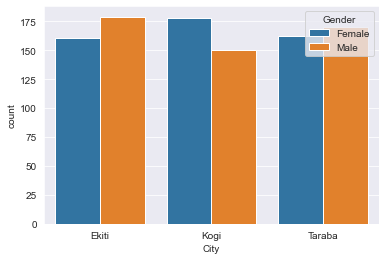

In [23]:
#plot1
sns.countplot('City' , hue='Gender' , data=df)

In [24]:
#gender with highest count in each city

df2=df[(df['City'] == 'Ekiti')].Gender.value_counts()
df2

#male

Male      179
Female    161
Name: Gender, dtype: int64

In [25]:
df2=df[(df['City'] == 'Taraba')].Gender.value_counts()
df2

#male

Male      170
Female    162
Name: Gender, dtype: int64

In [26]:
df2=df[(df['City'] == 'Kogi')].Gender.value_counts()
df2

#female

Female    178
Male      150
Name: Gender, dtype: int64

<AxesSubplot:xlabel='City', ylabel='count'>

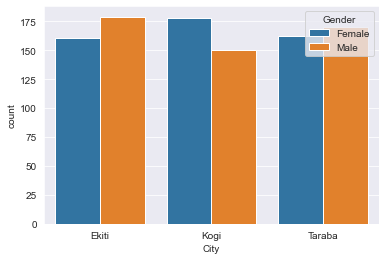

In [27]:
sns.countplot('City' , hue='Gender' , data=df)

In [28]:
#product with highest number of buyers(FASHION ACCESSORIES)

dff=df[(df['Product line'] == 'Fashion accessories')].Gender.value_counts().sum()
dff

178

In [29]:
dfe=df[(df['Product line'] == 'Electronic accessories')].Gender.value_counts().sum()
dfe

170

In [30]:
dfb=df[(df['Product line'] == 'Food and beverages')].Gender.value_counts().sum()
dfb

174

In [32]:
dfh=df[(df['Product line'] == 'Health and beauty')].Gender.value_counts().sum()
dfh

152

In [33]:
dfs=df[(df['Product line'] == 'Sports and travel')].Gender.value_counts().sum()
dfs

166

In [34]:
dfp=df[(df['Product line'] == 'Home and lifestyle')].Gender.value_counts().sum()
dfp

160

<AxesSubplot:xlabel='Product line', ylabel='count'>

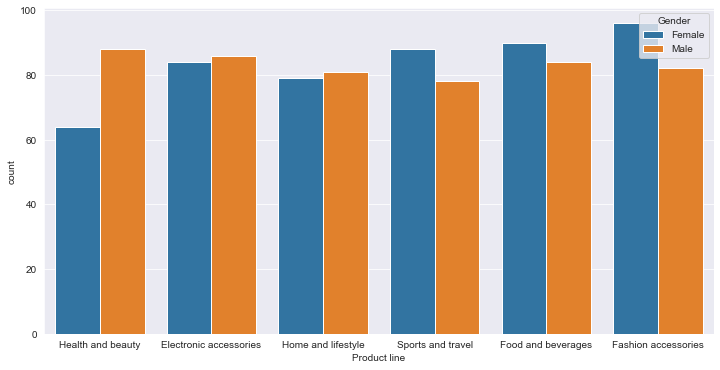

In [36]:
#plot3
plt.figure(figsize=(12,6))
sns.countplot('Product line' , hue='Gender' , data=df)

In [ ]:
#product bought most by males(HEALTH AND BEAUTY)

In [38]:
total=df[(df['Product line']=='Electronic accessories') & (df['Gender']=='Male')].Gender.value_counts()
total

Male    86
Name: Gender, dtype: int64

In [40]:
total=df[(df['Product line']=='Fashion accessories') & (df['Gender']=='Male')].Gender.value_counts()
total

Male    82
Name: Gender, dtype: int64

In [41]:
total=df[(df['Product line']=='Food and beverages') & (df['Gender']=='Male')].Gender.value_counts()
total

Male    84
Name: Gender, dtype: int64

In [43]:
total=df[(df['Product line']=='Health and beauty') & (df['Gender']=='Male')].Gender.value_counts()
total

Male    88
Name: Gender, dtype: int64

In [44]:
total=df[(df['Product line']=='Home and lifestyle') & (df['Gender']=='Male')].Gender.value_counts()
total

Male    81
Name: Gender, dtype: int64

In [45]:
total=df[(df['Product line']=='Sports and travel') & (df['Gender']=='Male')].Gender.value_counts()
total

Male    78
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Product line', ylabel='count'>

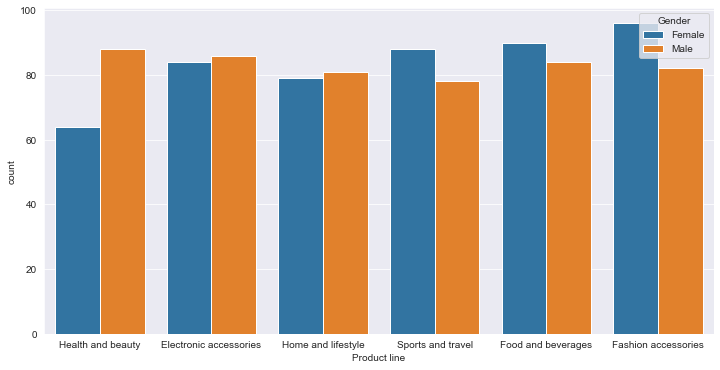

In [46]:
#plot4
plt.figure(figsize=(12,6))
sns.countplot('Product line' , hue='Gender' , data=df)

In [ ]:
#product bought most by females(FASHION ACCESSORIES)

In [48]:

total=df[(df['Product line']=='Sports and travel') & (df['Gender']=='Female')].Gender.value_counts()
total

Female    88
Name: Gender, dtype: int64

In [49]:
total=df[(df['Product line']=='Home and lifestyle') & (df['Gender']=='Female')].Gender.value_counts()
total

Female    79
Name: Gender, dtype: int64

In [51]:
total=df[(df['Product line']=='Health and beauty') & (df['Gender']=='Female')].Gender.value_counts()
total

Female    64
Name: Gender, dtype: int64

In [52]:
total=df[(df['Product line']=='Food and beverages') & (df['Gender']=='Female')].Gender.value_counts()
total

Female    90
Name: Gender, dtype: int64

In [53]:
total=df[(df['Product line']=='Fashion accessories') & (df['Gender']=='Female')].Gender.value_counts()
total

Female    96
Name: Gender, dtype: int64

In [54]:
total=df[(df['Product line']=='Electronic accessories') & (df['Gender']=='Female')].Gender.value_counts()
total

Female    84
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Product line', ylabel='count'>

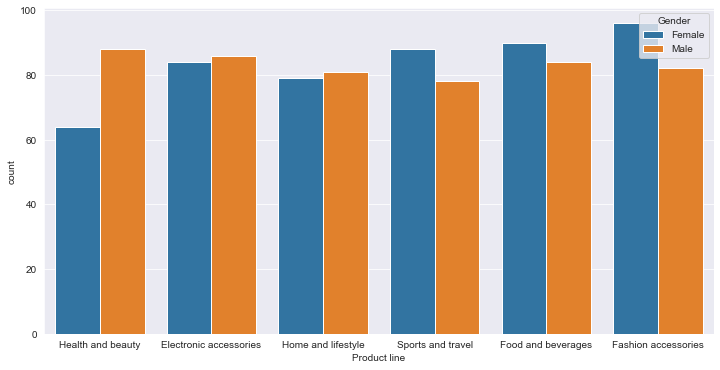

In [55]:
#plot5
plt.figure(figsize=(12,6))
sns.countplot('Product line' , hue='Gender' , data=df)

In [ ]:
#poroduct with highest average rating(FOOD AND BEVERAGES)

In [56]:
total=df[(df['Product line']=='Food and beverages') & (df['Rating']>=0)].mean()
total

Unit price                  56.008851
Quantity                     5.471264
Tax 5%                      15.365310
Total                      322.671517
cogs                       307.306207
gross margin percentage      4.761905
gross income                15.365310
Rating                       7.113218
dtype: float64

In [58]:
total=df[(df['Product line']=='Health and beauty') & (df['Rating']>=0)].mean()
total

Unit price                  54.854474
Quantity                     5.618421
Tax 5%                      15.411572
Total                      323.643020
cogs                       308.231447
gross margin percentage      4.761905
gross income                15.411572
Rating                       7.003289
dtype: float64

In [59]:
total=df[(df['Product line']=='Home and lifestyle') & (df['Rating']>=0)].mean()
total

Unit price                  55.316937
Quantity                     5.693750
Tax 5%                      16.030331
Total                      336.636956
cogs                       320.606625
gross margin percentage      4.761905
gross income                16.030331
Rating                       6.837500
dtype: float64

In [63]:
total=df[(df['Product line']=='Sports and travel') & (df['Rating']>=0)].mean()
total

Unit price                  56.993253
Quantity                     5.542169
Tax 5%                      15.812630
Total                      332.065220
cogs                       316.252590
gross margin percentage      4.761905
gross income                15.812630
Rating                       6.916265
dtype: float64

In [64]:
total=df[(df['Product line']=='Fashion accessories') & (df['Rating']>=0)].mean()
total

Unit price                  57.153652
Quantity                     5.067416
Tax 5%                      14.528062
Total                      305.089298
cogs                       290.561236
gross margin percentage      4.761905
gross income                14.528062
Rating                       7.029213
dtype: float64

In [65]:
total=df[(df['Product line']=='Electronic accessories') & (df['Rating']>=0)].mean()
total

Unit price                  53.551588
Quantity                     5.711765
Tax 5%                      15.220597
Total                      319.632538
cogs                       304.411941
gross margin percentage      4.761905
gross income                15.220597
Rating                       6.924706
dtype: float64

<AxesSubplot:xlabel='Product line', ylabel='Rating'>

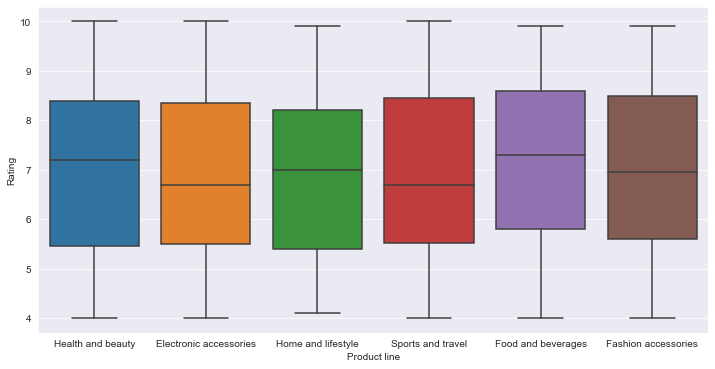

In [66]:
#plot6  
plt.figure(figsize=(12,6))
sns.boxplot(y= 'Rating',x='Product line', data=df)

In [67]:
df.Rating.unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

In [72]:
#Gender with highest average rating(MALE)

total=df[(df['Gender']=='Male') & (df['Rating']>=0)].mean()
total

Unit price                  56.081944
Quantity                     5.292585
Tax 5%                      14.799487
Total                      310.789226
cogs                       295.989739
gross margin percentage      4.761905
gross income                14.799487
Rating                       6.980962
dtype: float64

In [69]:
total=df[(df['Gender']=='Female') & (df['Rating']>=0)].mean()
total

Unit price                  55.263952
Quantity                     5.726547
Tax 5%                      15.956936
Total                      335.095659
cogs                       319.138723
gross margin percentage      4.761905
gross income                15.956936
Rating                       6.964471
dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Rating'>

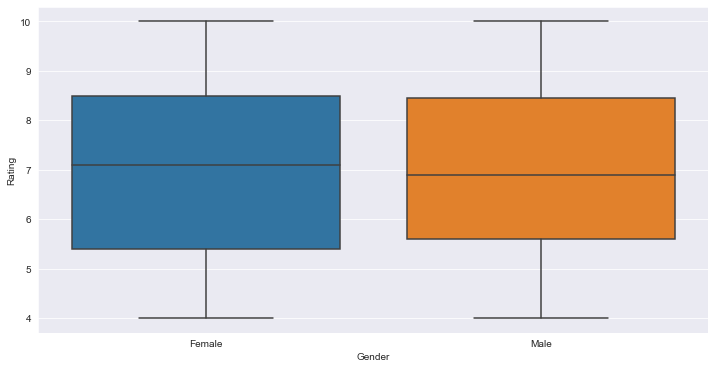

In [70]:
#plot7
plt.figure(figsize=(12,6))
sns.boxplot(y= 'Rating',x='Gender', data=df)

In [73]:
df.rename(columns={'Invoice ID': 'Invoice_ID', 'Customer type':'Customer_type', 'Product line':'Product_line', 'Unit price':'Unit_price','gross margin percentage':'gross_margin_percentage', 'gross income':'gross_income'}, inplace=True)

In [74]:
df.head(2)

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Ekiti,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Kogi,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [75]:
#customer type domination in each store


dfp=df[(df['Branch'] == 'A')].Customer_type.value_counts()
dfp

#NORMAL

Normal    173
Member    167
Name: Customer_type, dtype: int64

In [76]:
dfp=df[(df['Branch'] == 'B')].Customer_type.value_counts()
dfp

# NORMAL

Normal    167
Member    165
Name: Customer_type, dtype: int64

In [77]:
dfp=df[(df['Branch'] == 'C')].Customer_type.value_counts()
dfp

# MEMBER

Member    169
Normal    159
Name: Customer_type, dtype: int64

<AxesSubplot:xlabel='Branch', ylabel='count'>

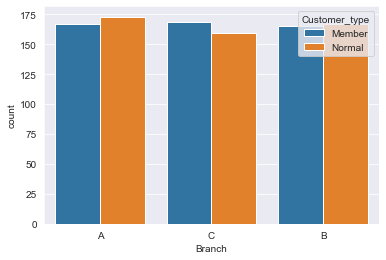

In [79]:
#plot8plt.figure(figsize=(12,6))
sns.countplot('Branch' , hue='Customer_type' , data=df)

In [80]:
df['Date'] = pd.to_datetime(df.Date)
df.dtypes

Invoice_ID                         object
Branch                             object
City                               object
Customer_type                      object
Gender                             object
Product_line                       object
Unit_price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross_margin_percentage           float64
gross_income                      float64
Rating                            float64
dtype: object

In [81]:
df['Time'] = pd.to_datetime(df.Time)
df.dtypes

Invoice_ID                         object
Branch                             object
City                               object
Customer_type                      object
Gender                             object
Product_line                       object
Unit_price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross_margin_percentage           float64
gross_income                      float64
Rating                            float64
dtype: object

In [82]:
import datetime as dt

df['year']=df.Date.dt.year
df.head(3)

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,year
0,750-67-8428,A,Ekiti,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-04-22 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019
1,226-31-3081,C,Kogi,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-04-22 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019
2,631-41-3108,A,Ekiti,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-04-22 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019


In [83]:
df['month']=df.Date.dt.month
df.head(3)

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,year,month
0,750-67-8428,A,Ekiti,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-04-22 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,1
1,226-31-3081,C,Kogi,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-04-22 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019,3
2,631-41-3108,A,Ekiti,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-04-22 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019,3


In [84]:
df['day']=df.Date.dt.day
df.head(3)

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,year,month,day
0,750-67-8428,A,Ekiti,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-04-22 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5
1,226-31-3081,C,Kogi,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-04-22 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019,3,8
2,631-41-3108,A,Ekiti,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-04-22 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3


In [85]:
df['hour']=df.Time.dt.hour
df.head(2)

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,year,month,day,hour
0,750-67-8428,A,Ekiti,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2022-04-22 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,13
1,226-31-3081,C,Kogi,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2022-04-22 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019,3,8,10


In [86]:
df['minute']=df.Time.dt.minute
df.head(2)

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Total,...,Payment,cogs,gross_margin_percentage,gross_income,Rating,year,month,day,hour,minute
0,750-67-8428,A,Ekiti,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,13,8
1,226-31-3081,C,Kogi,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019,3,8,10,29


In [87]:
df['second']=df.Time.dt.second
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Total,...,cogs,gross_margin_percentage,gross_income,Rating,year,month,day,hour,minute,second
0,750-67-8428,A,Ekiti,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019,1,5,13,8,0
1,226-31-3081,C,Kogi,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019,3,8,10,29,0
2,631-41-3108,A,Ekiti,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,2019,3,3,13,23,0
3,123-19-1176,A,Ekiti,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,2019,1,27,20,33,0
4,373-73-7910,A,Ekiti,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,2019,2,8,10,37,0


In [ ]:
#month with highest sales(MONTH 1 (JAN))

In [89]:
df.month.value_counts()

1    352
3    345
2    303
Name: month, dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

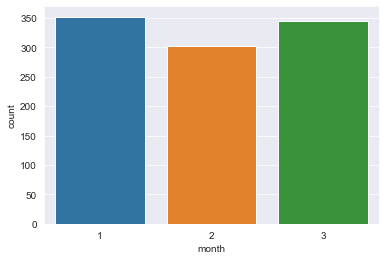

In [91]:
#plot9
sns.countplot('month', data=df)

In [ ]:
#month with highest gross income(MONTH 1)

In [92]:
dff=df[(df['month'] == 2)].gross_income.sum()
dff

4629.494000000001

In [93]:
dff=df[(df['month'] == 3)].gross_income.sum()
dff

5212.1669999999995

In [94]:
dff=df[(df['month'] == 1)].gross_income.sum()
dff

5537.708

In [97]:
#who spend most on average( females cos they buy more)

df.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

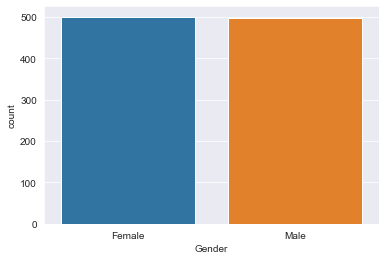

In [98]:
#plot11 spend most on av
sns.countplot('Gender', data=df)

In [ ]:
#hr with highest sales(hour 19)

In [99]:
df.hour.value_counts()

19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: hour, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

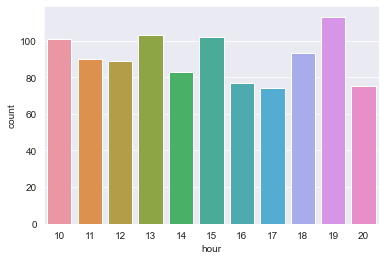

In [102]:
#plot12 most sales hr
sns.countplot('hour', data=df)

In [103]:
#minimum quantity(  1  "ONE")


df.head(2)

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Total,...,cogs,gross_margin_percentage,gross_income,Rating,year,month,day,hour,minute,second
0,750-67-8428,A,Ekiti,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019,1,5,13,8,0
1,226-31-3081,C,Kogi,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019,3,8,10,29,0


In [143]:
df.Quantity.unique()

array([ 7,  5,  8,  6, 10,  2,  3,  4,  1,  9], dtype=int64)

<AxesSubplot:xlabel='Quantity', ylabel='count'>

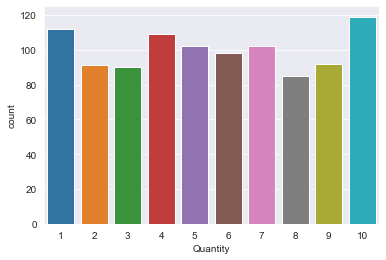

In [145]:
#plot13 min quant(not plotable)
sns.countplot('Quantity', data=df)

In [108]:
#most payment method by each gender"M"(Ewallet)

df.Payment.value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [109]:
total=df[(df['Gender']=='Male') & (df['Payment']=='Ewallet')].Gender.value_counts()
total

Male    185
Name: Gender, dtype: int64

In [111]:
total=df[(df['Gender']=='Male') & (df['Payment']=='Cash')].Gender.value_counts()
total

Male    166
Name: Gender, dtype: int64

In [112]:
total=df[(df['Gender']=='Male') & (df['Payment']=='Credit card')].Gender.value_counts()
total

Male    148
Name: Gender, dtype: int64

In [ ]:
#most payment method by each gender(F)(CASH)

In [113]:
total=df[(df['Gender']=='Female') & (df['Payment']=='Ewallet')].Gender.value_counts()
total

Female    160
Name: Gender, dtype: int64

In [114]:
total=df[(df['Gender']=='Female') & (df['Payment']=='Cash')].Gender.value_counts()
total

Female    178
Name: Gender, dtype: int64

In [115]:
total=df[(df['Gender']=='Female') & (df['Payment']=='Credit card')].Gender.value_counts()
total

Female    163
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Payment', ylabel='count'>

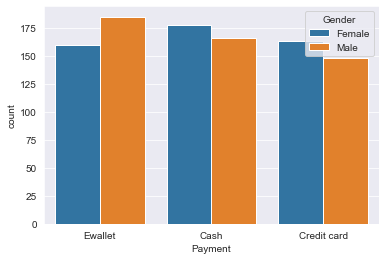

In [116]:
# plot 14 for each gender

sns.countplot('Payment' , hue='Gender' , data=df)

In [117]:
#most payment method by each customer type
# NORMAL(EWALLET)
# MEMBER(CREDIT CARD)


In [118]:
total=df[(df['Customer_type']=='Normal') & (df['Payment']=='Ewallet')].Customer_type.value_counts()
total

Normal    184
Name: Customer_type, dtype: int64

In [119]:
total=df[(df['Customer_type']=='Normal') & (df['Payment']=='Cash')].Customer_type.value_counts()
total

Normal    176
Name: Customer_type, dtype: int64

In [120]:
total=df[(df['Customer_type']=='Normal') & (df['Payment']=='Credit card')].Customer_type.value_counts()
total

Normal    139
Name: Customer_type, dtype: int64

In [121]:
total=df[(df['Customer_type']=='Member') & (df['Payment']=='Ewallet')].Customer_type.value_counts()
total

Member    161
Name: Customer_type, dtype: int64

In [122]:
total=df[(df['Customer_type']=='Member') & (df['Payment']=='Cash')].Customer_type.value_counts()
total

Member    168
Name: Customer_type, dtype: int64

In [123]:
total=df[(df['Customer_type']=='Member') & (df['Payment']=='Credit card')].Customer_type.value_counts()
total

Member    172
Name: Customer_type, dtype: int64

<AxesSubplot:xlabel='Payment', ylabel='count'>

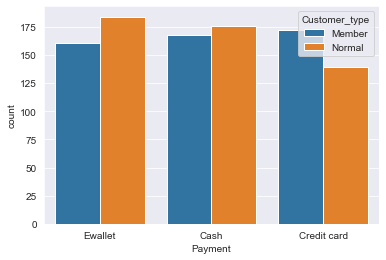

In [124]:
#plot 15
sns.countplot('Payment' , hue='Customer_type' , data=df)

In [125]:
#Average rating for each of the cities

In [126]:
total=df[(df['City']=='Ekiti') & (df['Rating']>=0)].mean()
total

# 7.02

Unit_price                   54.780853
Quantity                      5.467647
Tax 5%                       14.874001
Total                       312.354031
cogs                        297.480029
gross_margin_percentage       4.761905
gross_income                 14.874001
Rating                        7.027059
year                       2019.000000
month                         2.023529
day                          15.388235
hour                         14.667647
minute                       28.682353
second                        0.000000
dtype: float64

In [127]:
total=df[(df['City']=='Taraba') & (df['Rating']>=0)].mean()
total

# 6.82

Unit_price                   55.659277
Quantity                      5.481928
Tax 5%                       15.232024
Total                       319.872506
cogs                        304.640482
gross_margin_percentage       4.761905
gross_income                 15.232024
Rating                        6.818072
year                       2019.000000
month                         2.003012
day                          15.265060
hour                         15.147590
minute                       31.403614
second                        0.000000
dtype: float64

In [128]:
total=df[(df['City']=='Kogi') & (df['Rating']>=0)].mean()
total

# 7.07

Unit_price                   56.609024
Quantity                      5.582317
Tax 5%                       16.052367
Total                       337.099715
cogs                        321.047348
gross_margin_percentage       4.761905
gross_income                 16.052367
Rating                        7.072866
year                       2019.000000
month                         1.951220
day                          15.109756
hour                         14.920732
minute                       30.243902
second                        0.000000
dtype: float64

<AxesSubplot:xlabel='City', ylabel='Rating'>

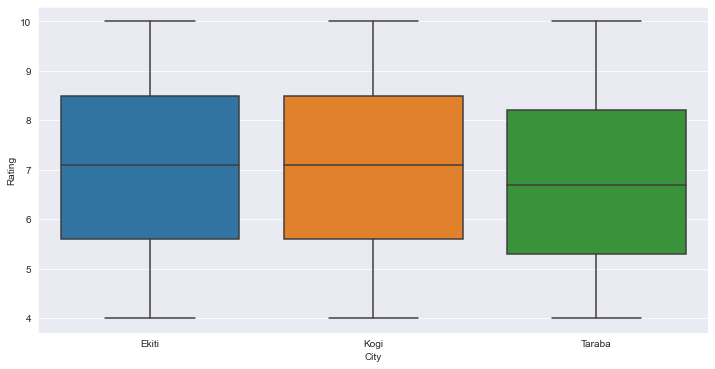

In [129]:
# plot16

plt.figure(figsize=(12,6))
sns.boxplot(y= 'Rating',x='City', data=df)

In [131]:
#AVERAGE RATING FOR EACH OF THE PRODUCTS

total=df[(df['Product_line']=='Food and beverages') & (df['Rating']>=0)].mean()
total

# 7.11

Unit_price                   56.008851
Quantity                      5.471264
Tax 5%                       15.365310
Total                       322.671517
cogs                        307.306207
gross_margin_percentage       4.761905
gross_income                 15.365310
Rating                        7.113218
year                       2019.000000
month                         2.000000
day                          15.201149
hour                         15.385057
minute                       29.770115
second                        0.000000
dtype: float64

In [132]:
total=df[(df['Product_line']=='Health and beauty') & (df['Rating']>=0)].mean()
total

# 7.00

Unit_price                   54.854474
Quantity                      5.618421
Tax 5%                       15.411572
Total                       323.643020
cogs                        308.231447
gross_margin_percentage       4.761905
gross_income                 15.411572
Rating                        7.003289
year                       2019.000000
month                         2.052632
day                          15.611842
hour                         14.868421
minute                       29.828947
second                        0.000000
dtype: float64

In [133]:
total=df[(df['Product_line']=='Home and lifestyle') & (df['Rating']>=0)].mean()
total

# 6.83

Unit_price                   55.316937
Quantity                      5.693750
Tax 5%                       16.030331
Total                       336.636956
cogs                        320.606625
gross_margin_percentage       4.761905
gross_income                 16.030331
Rating                        6.837500
year                       2019.000000
month                         2.025000
day                          14.293750
hour                         14.450000
minute                       33.212500
second                        0.000000
dtype: float64

In [134]:
total=df[(df['Product_line']=='Sports and travel') & (df['Rating']>=0)].mean()
total

# 6.91

Unit_price                   56.993253
Quantity                      5.542169
Tax 5%                       15.812630
Total                       332.065220
cogs                        316.252590
gross_margin_percentage       4.761905
gross_income                 15.812630
Rating                        6.916265
year                       2019.000000
month                         1.897590
day                          14.909639
hour                         14.656627
minute                       28.692771
second                        0.000000
dtype: float64

In [135]:
total=df[(df['Product_line']=='Fashion accessories') & (df['Rating']>=0)].mean()
total

# 7.02

Unit_price                   57.153652
Quantity                      5.067416
Tax 5%                       14.528062
Total                       305.089298
cogs                        290.561236
gross_margin_percentage       4.761905
gross_income                 14.528062
Rating                        7.029213
year                       2019.000000
month                         1.943820
day                          15.264045
hour                         15.056180
minute                       29.825843
second                        0.000000
dtype: float64

In [136]:
total=df[(df['Product_line']=='Electronic accessories') & (df['Rating']>=0)].mean()
total

# 6.92

Unit_price                   53.551588
Quantity                      5.711765
Tax 5%                       15.220597
Total                       319.632538
cogs                        304.411941
gross_margin_percentage       4.761905
gross_income                 15.220597
Rating                        6.924706
year                       2019.000000
month                         2.047059
day                          16.229412
hour                         14.988235
minute                       29.400000
second                        0.000000
dtype: float64

<AxesSubplot:xlabel='Product_line', ylabel='Rating'>

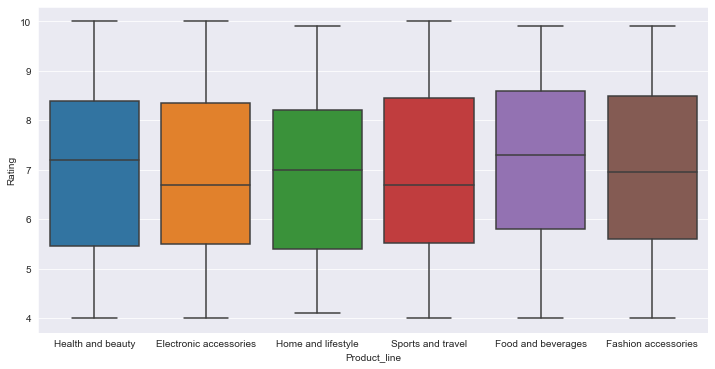

In [137]:
# plot17

plt.figure(figsize=(12,6))
sns.boxplot(y= 'Rating',x='Product_line', data=df)

In [ ]:
#city with highest sum of rating(Ekiti)

In [138]:
city= df.groupby('City')

In [139]:
city.agg({'Rating': "sum"})

,Rating
City,
Ekiti,2389.2
Kogi,2319.9
Taraba,2263.6


In [146]:
# CONCLUSION AND RECOMMENDATION

#ADVERTISEMENT SHOULD BE INTENSIFIED IN BOTH TARABA ANG KOGI STATES TO BRING IN MORE BUYERS 
#PRODUCT ADVERTISERS SHOULD WORK MORE ON FEMALE CLIENTS IN EKITI AND TARABA STATES 
#BENEFITS OF HEALTH AND BEAUTY PRODUCTS SHOULD BE SHOWN TO FEMALES SO THAT THEY CAN ALSO BUY AS MUCH AS MALES
# BRANCHES IN TARABA STATE SHOULD WORK MORE CUSTOMER SATISFACTION BEING THE LEAST RATED
#THE SUPERMARKET SHOULD WORK MORE ON THEIR HOME AND LIFESTYLE PRODUCTS BEING THE LEAST RATED
#THE SUPERMARKET SHOULD INTENSIFY ADVERTS/BONUSES IN FEB AND MARCH TO INCREASE THEIR SALES 

In [147]:
df.to_csv('Capstone 053')